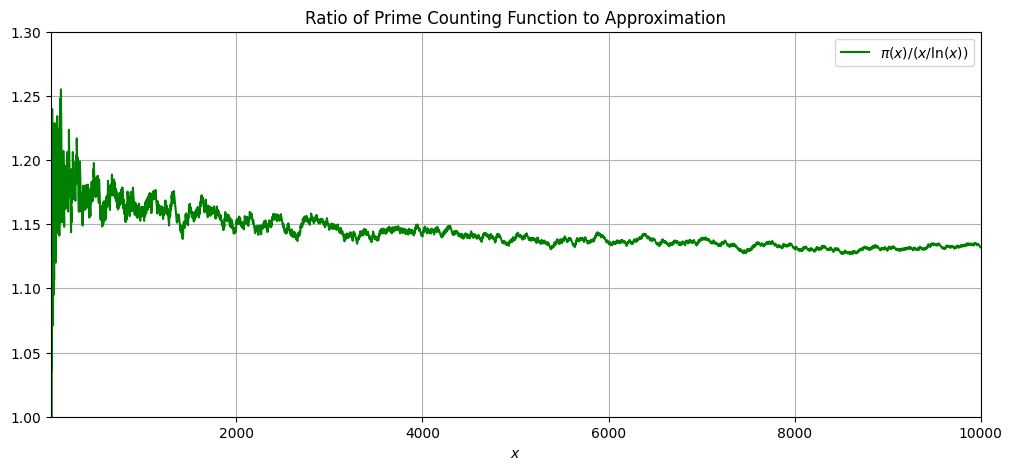

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def generate_primes(n):
    """Generate all prime numbers up to n."""
    primes = []
    candidate = 2
    while candidate <= n:
        is_prime = all(candidate % p != 0 for p in primes if p * p <= candidate)
        if is_prime:
            primes.append(candidate)
        candidate += 1
    return primes

# Parameters
x_max = 10000  # Range of x values to calculate π(x) and x/ln(x)

# Generate all primes up to x_max
primes = generate_primes(x_max)

# Compute π(x) (the prime counting function)
x_values = np.arange(2, x_max + 1)  # x values starting from 2
pi_x = np.zeros_like(x_values, dtype=int)  # Initialize π(x)
prime_set = set(primes)  # Convert primes to a set for faster lookups

# Fill π(x) by counting primes up to each x
count = 0
for i, x in enumerate(x_values):
    if x in prime_set:
        count += 1
    pi_x[i] = count

# Compute x/ln(x)
x_ln_x = np.array([x / np.log(x) if x > 1 else 0 for x in x_values])
x_lg_x = np.array([x / np.log(x) if x > 1 else 0 for x in x_values])

# Compute the ratio π(x) / (x/ln(x))
ratio1 = pi_x / x_ln_x

# Plot π(x) / (x/ln(x))
plt.figure(figsize=(12, 5))
plt.plot(x_values, ratio1, label=r"$\pi(x) / (x / \ln(x))$", color='green')

# Set axis ranges
plt.xlim(2, x_max)
plt.ylim(1, 1.3)

# Add labels, grid, and legend
plt.xlabel("$x$")
# plt.ylabel("$\pi(x) / (x / \ln(x))$")
plt.title("Ratio of Prime Counting Function to Approximation")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


TypeError: print_png() got an unexpected keyword argument 'aspect'

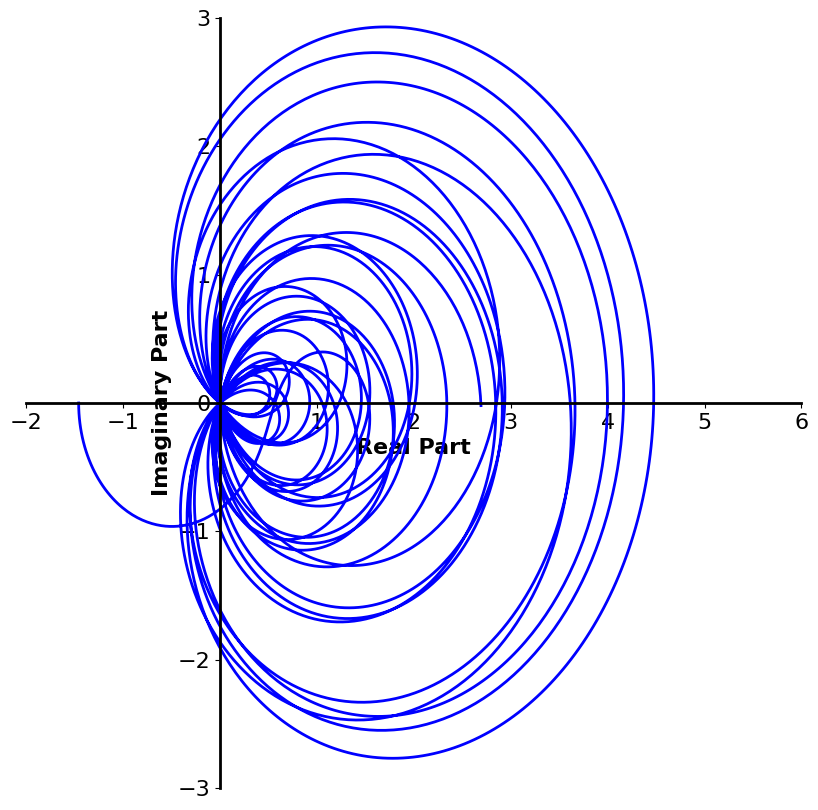

In [17]:


# import libraries
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from mpmath import *

import warnings

warnings.filterwarnings("ignore")  # ignore warnings
mp.dps = 10; mp.pretty = False

N = 10000 # the number of discrete steps
T = 100 # the number of continuous time steps
dt = 1.0 * T/N  # total number of time steps
t = linspace(0.0, N*dt, N+1)
z = [zeta(0.5 + tt*j) for tt in t]

re_z = np.array([float(z[i].real) for i in range(len(z))])  # parse the real part
im_z = np.array([float(z[i].imag) for i in range(len(z))])  # parse the imag part


fig = plt.figure(figsize=(10, 10), frameon=False)
ax = plt.axes(xlim=(-2, 6), ylim=(-3, 3))  # create an axes object

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xlabel('Real Part', fontsize=16, fontweight='bold')
ax.set_ylabel('Imaginary Part', fontsize=16, fontweight='bold')
ax.spines['left'].set_position('zero')
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_linewidth(2.0)

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.tick_params(labelsize=16)
plt.gcf().text(0.6, 0.15, ' ', fontsize=22, fontfamily='Verdana')

plt.plot(re_z, im_z, lw=2, color='b')
plt.savefig('riemann_zeta_zeros.png', dpi=300, bbox_inches='tight', aspect='auto')

